<a href="https://colab.research.google.com/github/omdena/policy_pandemic/blob/master/task6_clustering_without_test_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since PCA has been used in the below process the analysis should be only used to extract global behavioural charecteristics and one should be very careful in extracting with the local features of the clustered countries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [0]:
def dimentionality_reduction(df,exclude,method,**kwargs):
  df=df.dropna()
  if method=='pca_df':
    if 'n_components' in kwargs:
      return pca_df(df,exclude,kwargs.get("n_components"))
    else:
      return pca_df(df,exclude,4)
  elif method=='decide_pca':
    decide_pca(df,exclude)

def decide_pca(df,exclude):
  df_cc=df.drop(exclude,axis=1)
  pca=PCA()
  pca.fit(df_cc)
  plt.figure(figsize=(10,8))
  print(pca.explained_variance_ratio_)
  n=len(pca.explained_variance_ratio_)
  plt.plot(range(0,n),np.float64(1.0)*(pca.explained_variance_ratio_.cumsum()),marker='o',linestyle='--')
  plt.title('Explained variance by components')
  plt.xlabel('Number of components')
  plt.ylabel('Cumulative Explained Variance')

def pca_df(df,exclude,ncomponents):
  df_cc=df.drop(exclude,axis=1)
  pca=PCA(n_components=ncomponents)
  pca.fit(df_cc)
  pca_res=pca.transform(df_cc)
  return pca_res

[4.93595682e-01 1.46953440e-01 8.41120159e-02 6.33972164e-02
 4.79841205e-02 3.63542864e-02 2.94362475e-02 2.42291466e-02
 1.79540393e-02 1.44469021e-02 1.05382738e-02 9.24311812e-03
 6.18485904e-03 5.75208930e-03 4.53091201e-03 2.69138884e-03
 1.52136021e-03 8.65413794e-04 2.09488851e-04]


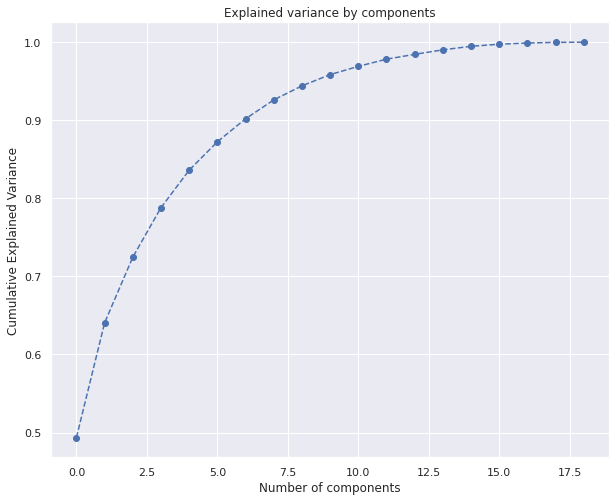

In [0]:
df=pd.read_csv('scaled_healthcare_features(static+dynamic).csv')
df=df.drop(['average_new_tests'],axis=1)
df=df.dropna()
dimentionality_reduction(df,['Country','Class'],'decide_pca')

Choosing 4 number of principal componenets since it explains about 85% of data



In [0]:
pca_comp=dimentionality_reduction(df,['Country','Class'],'pca_df',n_components=4)

In [0]:
print(pca_comp)

[[ 1.06525129 -1.00811391 -0.60302763 -0.65824047]
 [ 3.26188353 -0.97461729  0.71806228 -0.8164064 ]
 [-3.13706544 -0.37736605 -0.05359143  1.19422385]
 [-0.34326841  0.75052698  0.25267515 -0.75873039]
 [ 2.9615432  -0.30121094  0.76813964 -0.91514894]
 [ 0.55811264 -0.80555182  0.79531569 -0.91751966]
 [ 3.20629252 -0.79266972  0.30742655 -0.75426962]
 [-0.21233441 -0.1221823   1.31683988 -1.2918823 ]
 [-2.01550026 -0.19089047 -0.59851613  0.70235685]
 [-4.94111714  1.21251366  1.41757266 -1.25855362]
 [ 4.7791829   1.14875982 -1.05958265 -0.24783946]
 [ 1.33430851 -1.62049163 -1.76499326  0.40243247]
 [-3.86657654  1.80020565 -0.06542597  2.19427626]
 [-2.78135758 -0.43511448 -1.68285284  1.78641743]
 [ 0.9972508   1.41651388  0.64842252 -0.10202075]
 [ 4.44139656  1.74523201 -0.51305759  0.50846773]
 [ 4.00074147 -1.72485922 -0.79624107 -0.91634576]
 [-4.00695786  0.85882043  1.15979691 -1.47605879]
 [-0.32880974 -0.97209298 -0.03269804  0.46575683]
 [-3.24186333  0.07813171 -0.62

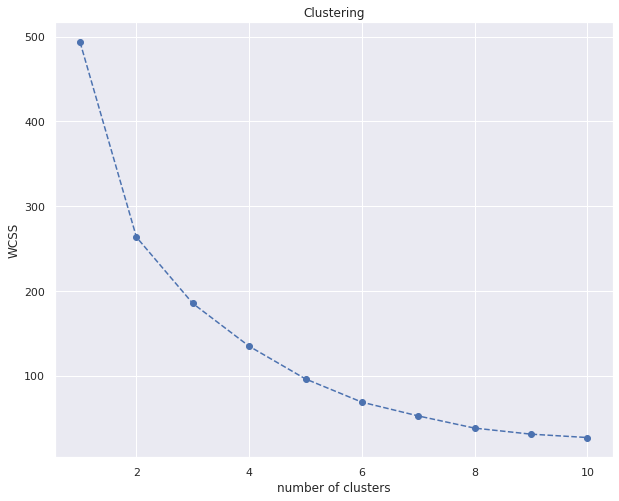

In [0]:
def decide_kmeans(comp):
  wcss=[]
  for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(comp)
    wcss.append(km.inertia_)
  plt.figure(figsize=(10,8))
  plt.plot(range(1,11),wcss,marker='o',linestyle='--')
  plt.title("Clustering")
  plt.xlabel("number of clusters")
  plt.ylabel("WCSS")

decide_kmeans(pca_comp)

we can notice the kink at 4



In [0]:
def c_kmeans(comp):
  km=KMeans(n_clusters=4,init='k-means++')
  km.fit(comp)
  return km.labels_

cluster_labels=c_kmeans(pca_comp)


In [0]:
cluster_labels

array([2, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 1,
       2, 1, 2, 0, 1, 0, 0, 2, 2, 3, 2, 1], dtype=int32)

In [0]:
def merge_label(df,label):
  pd_labels=pd.DataFrame({'cluster_label':label})
  df=df.merge(pd_labels,left_index=True,right_index=True)
  return df

temp=merge_label(df,cluster_labels)
temp.to_csv('clustered_data.csv')

In [0]:
temp

In [0]:
temp=temp.merge(pd.DataFrame(pca_comp,columns=['pca1','pca2','pca3','pca4']),left_index=True,right_index=True)

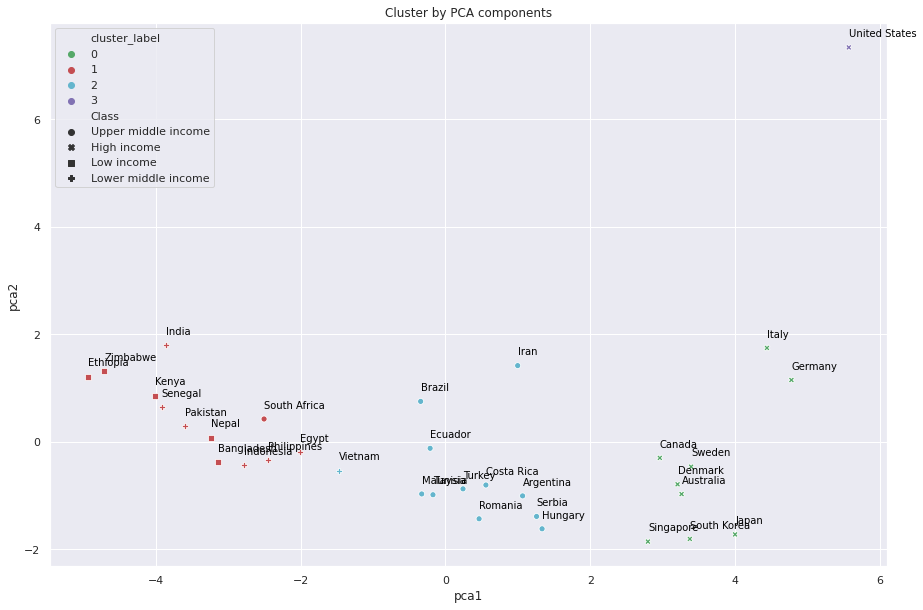

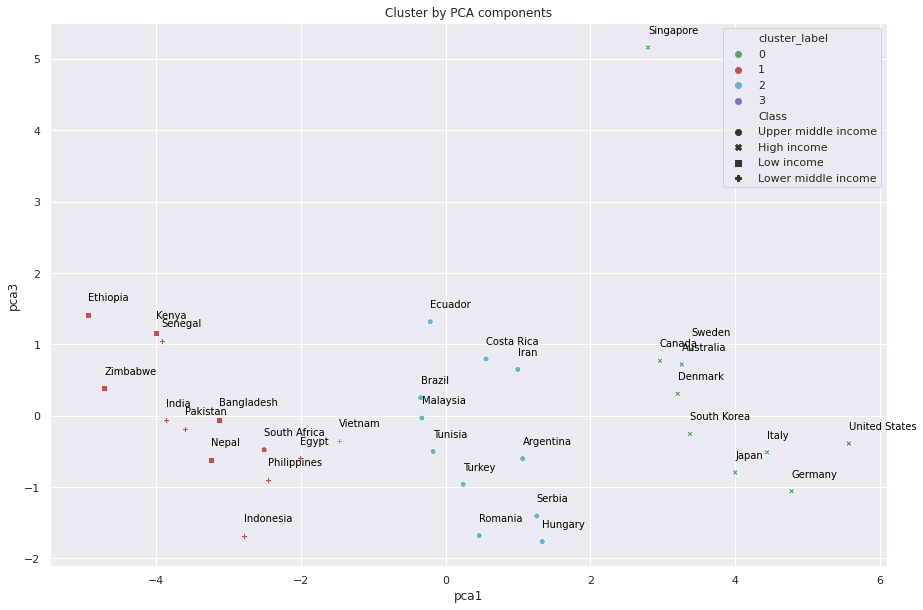

In [0]:
def plt_pca_cluster(df,cluster_labels):
  plt.figure(figsize=(15,10))
  p=sns.scatterplot(df['pca1'],df['pca2'],hue=df[cluster_labels],palette=['g','r','c','m'],style=df["Class"])
  for country in range(0,df.shape[0]):
    p.text(df.pca1[country], df.pca2[country]+0.2, df.Country[country],
           horizontalalignment='left', size='small', color='black')
  plt.title('Cluster by PCA components')
  plt.show()
  plt.figure(figsize=(15,10))
  p=sns.scatterplot(df['pca1'],df['pca3'],hue=df[cluster_labels],palette=['g','r','c','m'],style=df["Class"])
  for country in range(0,df.shape[0]):
    p.text(df.pca1[country], df.pca3[country]+0.2, df.Country[country],
           horizontalalignment='left', size='small', color='black')
  plt.title('Cluster by PCA components')
  plt.show()

plt_pca_cluster(temp,'cluster_label')